<a href="https://colab.research.google.com/github/yonathanarbel/AI-LAW/blob/main/Class_4_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today we are going to introduce deep learning (neural networks).

First, let's start with simple classification using Machine Learning techniques.

Deep learning is a subset of machine learning, which is a subset of AI.

Machine learning is a technique that determines the "model" from the "data."

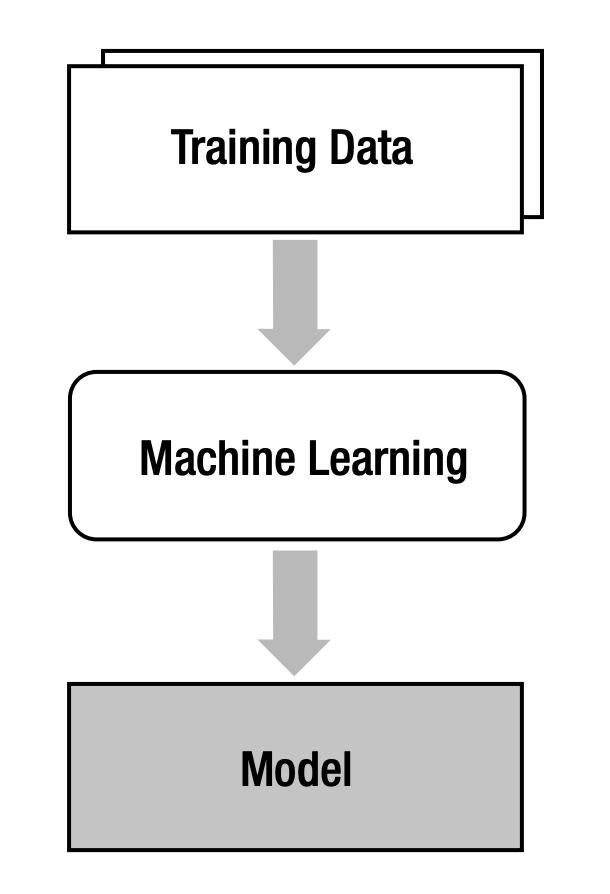

You are all familiar with modeling whether you realize it or not; all the laws of science are "models." We use logic, reasoning, and experiments to figure these laws out. We have discussed a few models in class. For example, remember when we tried to predict the price of a house based on its size in square feet? We used simple linear regression there, meaning we just used the $y=mx+b$ formula you are familiar with from high school. We also introduced a class of models called classification in our first lecture by way of example - classifying an email as spam or not spam. If you recall, though, we didn't talk about what model was used. Let's try to use linear regression to classify an email as spam or not spam based only on the number of exclamation points in the email.





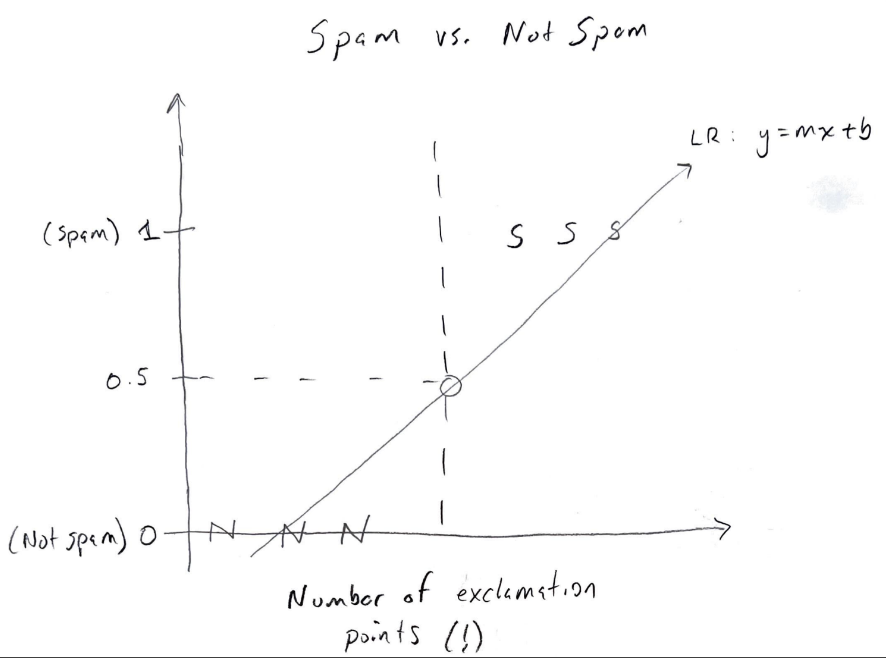

This seemed to work ok, but what if we introduce another email with lots of exclamation points. Will our model still work?

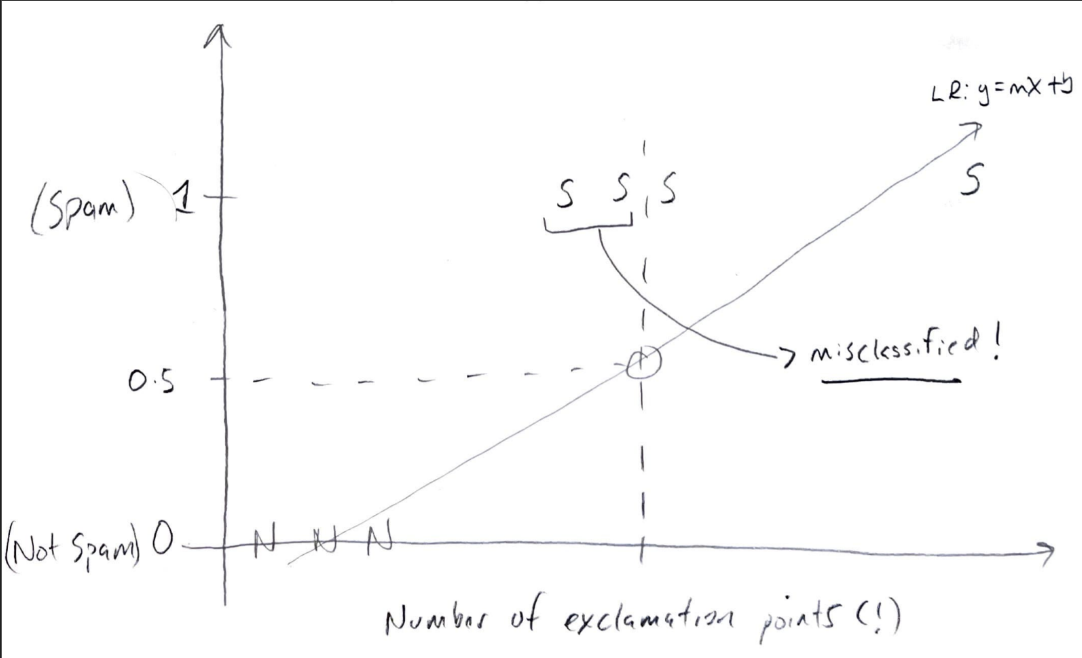

Ouch, our model failed! So how do we fix it?

Well, we need something less "rigid" than a line. Enter "logistic regression." Here is what it looks like graphically.

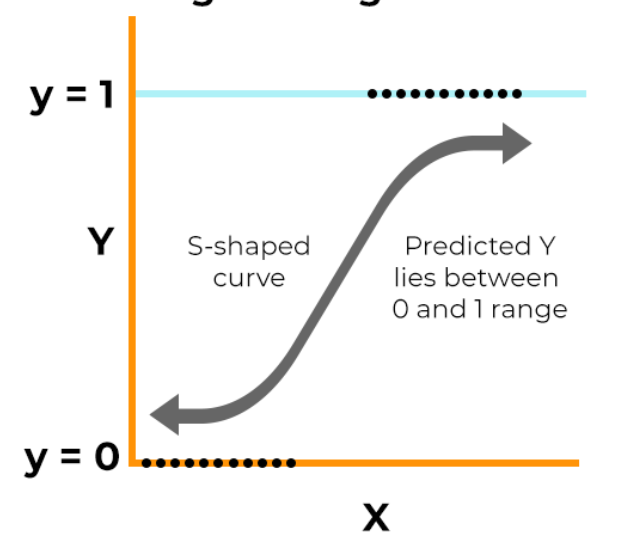

As you can see, the "S" shaped curve won't be thrown off by our email with many exclamation points and cause our model to fail by missing some spam.

Logistic regression works by feeding our $y=mx+b$ equation into into another equation called a sigmoid function: $f(z) = 1/(1+e^z)$, where $z = -mx - b$. That's how we get the "S" shape.

Don't get bogged down by this formula. You will see why we included it here later. For now, take note that when models fail, sometimes you have to find another model that works.

Despite our success with solving the spam versus not spam problem in linear regression with logistic regression, some models cannot be developed using simple iterative techniques. For example, let's recall our example of distinguishing betwen images of cats and dogs. Can you clearly state a rule or model for distinguishing between cats and dogs? Likely not - this task cannot be completed using logic and reasoning alone, but could you conduct an experiment to figure it out? Again, probably not. You learned what is a cat and what is a dog (probably at a young age) and now you "just know"; it turns out that computers can learn like you did. Enter deep learning.

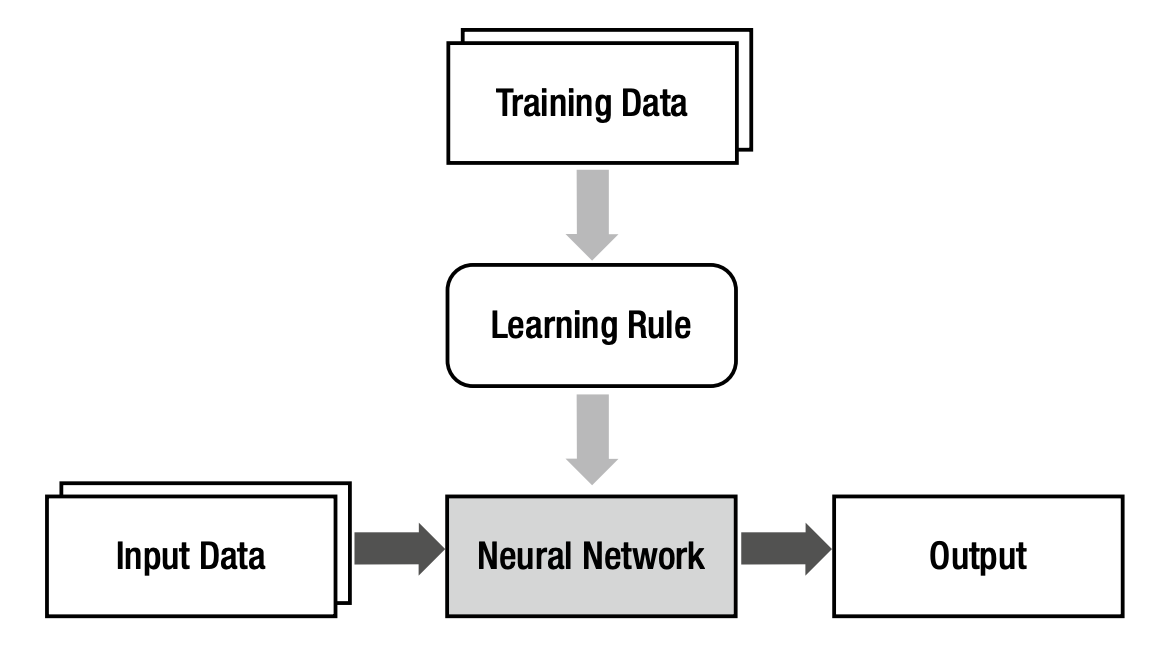

Neural networks are loosely modeled after neurons in the brain. Biological neurons transmit signals to one another and modify the strength of their connections to form information. Computational neurons are called "nodes" (also called perceptrons) and the connections between nodes are weakened or strengthened by the connection weight. Below is a node that receives three inputs, $X_i$, $i=1,2,3$, with corresponding weights $W_j$, $j=1,2,3$, and bias term b. In computational neural networks, bias is another term used to modify nodes. $y$ is the ouput of the node.
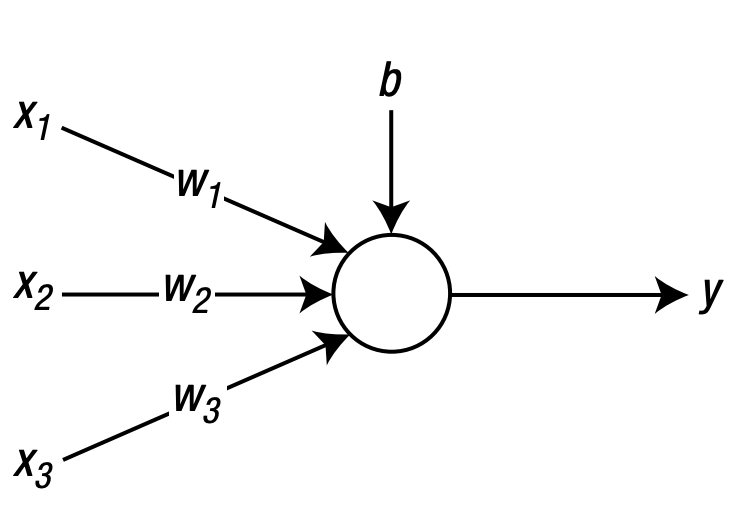

So how does this work?

$[(X_1*W_1) + (X_2*W_2) + (X_3*W_3) + b]$ is passed into the neuron. Then what happens?

Let's set the equation above equal to "v" meaning:
  $v = [(X_1*W_1) + (X_2*W_2) + (X_3*W_3) + b]$

Then, we pass $v$ into a nonlinear function called an activation function to get our output $y$. A nonlinear function means that as the input increases by one unit, the ouput is either less than or greater than 1 (not equal to 1). Geometrically, this means we will get a shape that is either concave or convex.

There are lots of different activation functions, each with different strengths and weaknesses. We will not go into too much detail about activation functions, other than to say that you have already seen a very popular activation function! It's the sigmoid function from logistic regression. And we hope that by the end of the lecture, you will see that logistic regression is really very similar to an individual neuron with one input in a neural netowrk.

But for now, just keep in mind that all we are concerned about is understanding the fundamental architecture and intuition behind neural networks. And later, we will implement neural networks in code.


Congratulations! You are 50% of the way there.

In practice, the structure we just created is replicated vertically, with columns of nodes, and horizontally, with different layers of nodes and an input and output later.
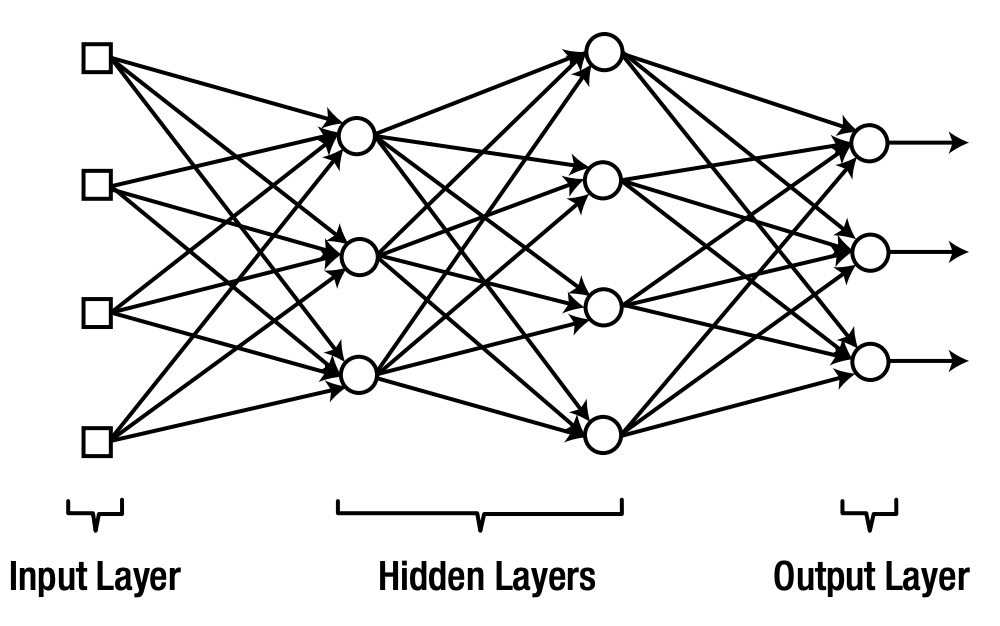

The squares in the first layer, the input layer, indicate that there is no weighted sum or activation function applied. The output later is simply the ouput. The ouput could be a feature vector (like an embedding) or a singular output like "cat" or "dog", usually denoted by a $1$ or $0$. The layers in the middle are called hidden layers.

Most neural networks in application today have hundreds, thousands, or even millions of neurons spread across dozens, or more, layers (neural networks without hidden layers are not very good learners, which we will see in a minute). At this scale, this amounts to large row by column matrix multiplication. Take our simple node from above, for example, where we mulitple $W*X$:
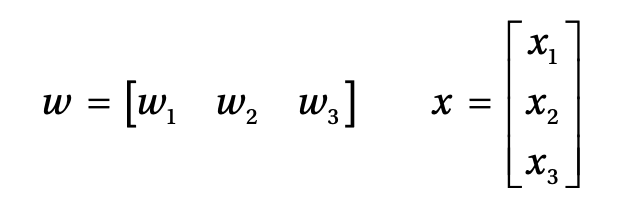

Let's do an example to solidfy the first "50%." Let's calculate the ouput of this simple neural network. We will assume our activation function is linear (in other words, it performs an identity operation - mulitplies it by 1, having no effect on on our calculation). Let's do the first layer together on the whiteboard.
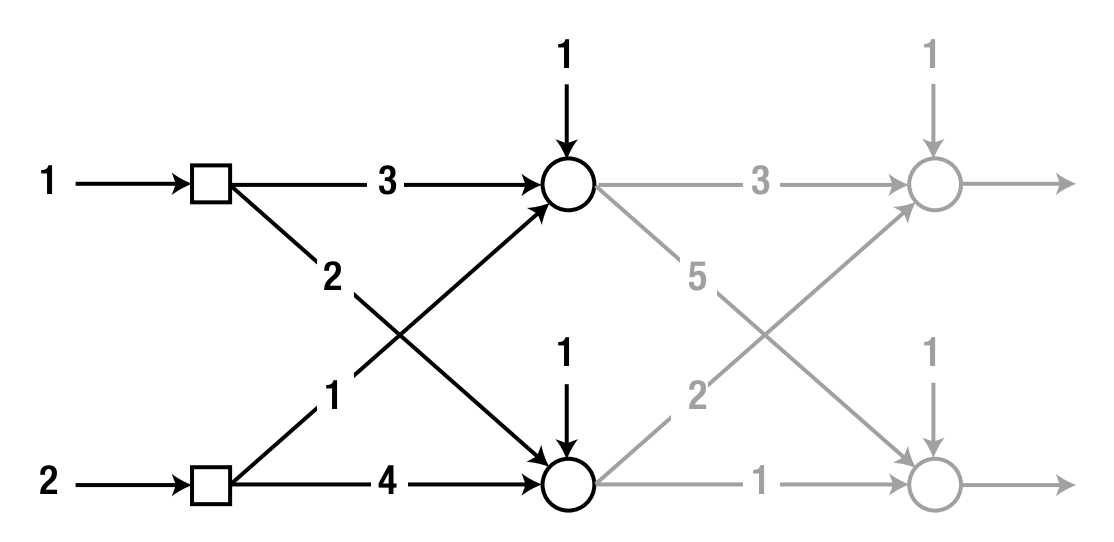

Now, let's do the second layer together on the whiteboard.
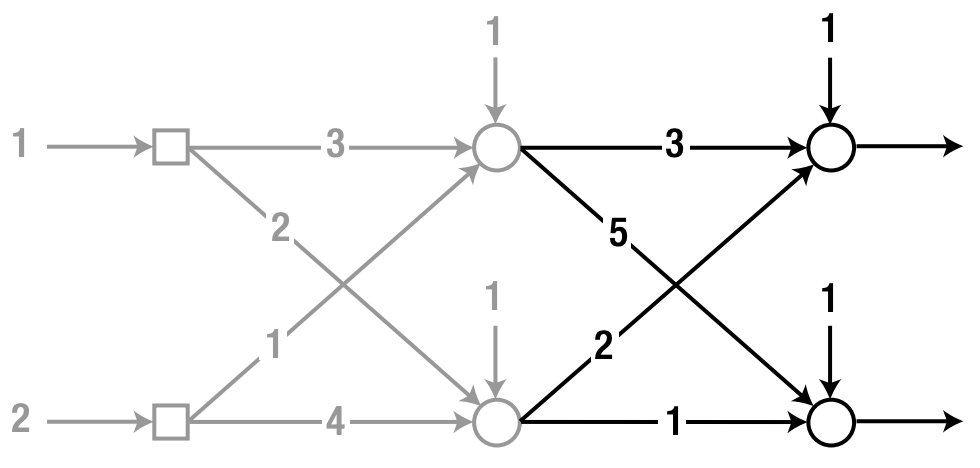




After we pass our input forward (left to right) through the architecture of the neural network, we will get ouput and we will compare the output to the correct output (in the supervised context, which is all we are talking about today). We train the network by adjusting the biases and weights to get closer to the desired output. We do this through methods called back-propagation, which essentially goes backward through the network using calculus (the level of adjustment is determined by calculating the gradients of the cost/loss function, which measures the error of the neural network) and gradient descent (recall the descending down the mountain blindfolded example from the first class).

We will not go through these methods in technical detail today, as it would involve breaking our promise of "no math" in the class, but we expect you to know the intution: based on the difference between the output and correct output, we adjust the weights and bias terms of all the nodes in the network to minimize the difference between the correct output and actual output (referred to as "minimizing loss"). After the adjustment of the weights and bias terms, the entire process is repeated - the forward pass through the network and then minimizing loss. The number of times we have to go through this process is known as epoch. What do you think is an average epoch?

If you would like to learn about back-propagation and gradient descent, there are plenty of great resources we can point you to. Ian Goodfellow's Deep Learning is excellent and is available free online (https://www.deeplearningbook.org/). You won't be expected to know back-propagation or gradient descent; only consult if you're curious.
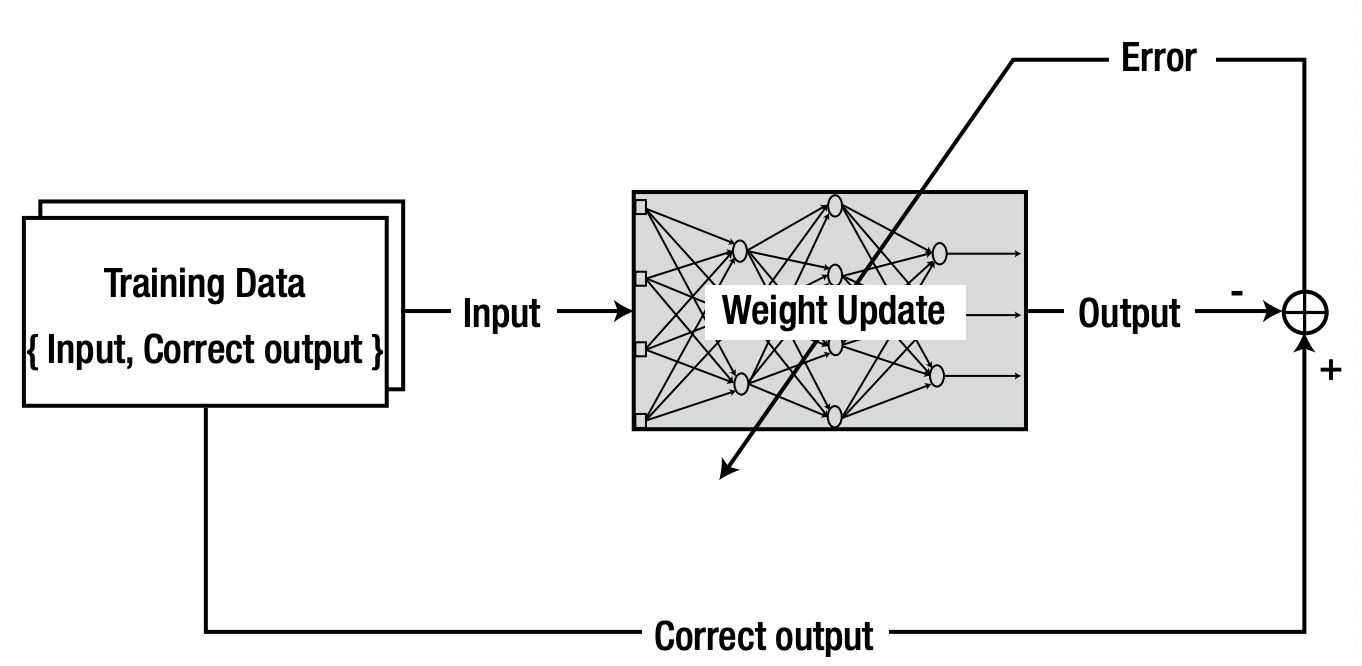

Now, let's do some coding and implement a simple feed forward, fully connected neural network from scratch (without any libraries or functions!). But, slow down - what is feed forward and fully connected?!

You already know, you just don't know the terms yet. The example we just calcuated was a feedforward, fully connected neural network. Feedforward means that the network flows from left to right without any cyles or loops (counter e.g. Recurrent Neural Networks or LLMs). Fully connected means that all the neurons are connected to one another.

We are going to do a classic problem that is the "hello world" of neural networks called the input parity problem. We will tackle the 4 input parity problem, where 1,2,3, and 4 below indicate four inputs into the network and the output is the correct output. Take a look at the data and state the "rule."

1 2 3 4  | Output
-----------------------------------|-------
   0        0        0        0     |   1
   0        0        0        1     |   0
   0        0        1        0     |   0
   0        0        1        1     |   1
   0        1        0        0     |   0
   0        1        0        1     |   1
   0        1        1        0     |   1
   0        1        1        1     |   0
   1        0        0        0     |   0
   1        0        0        1     |   1
   1        0        1        0     |   1
   1        0        1        1     |   0
   1        1        0        0     |   1
   1        1        0        1     |   0
   1        1        1        0     |   0
   1        1        1        1     |   1

The model we want the network to learn is simple. For any odd number of ones in the input, the output is 0, and for any even number of ones, the output is 1. Look at the data to confirm for yourself and note that 0 is an even number. We want the neural network to learn this rule just from the data!

We will start with a three layer neural network composed of the following structure: an input layer with 4 "inputs", one hidden layer with 4 nodes, and 1 output in the output layer (1 or 0).

Take note, again, that the code below doesn't use any deep learning libraires. This is a neural network from scratch, just using logic and code in Python. In practice, nobody would do this as it is tedious and for a large network, very difficult. Only "researchers" developing new neural networks would create the network from scratch, which would then be convereted into a function and subsequently deployed in industry at scale.

Doing this from scratch allows us to see the mechanisms we discussed above in action. Let's go through the code and try to decipher what is going on and how it works!

In [ ]:
import random # not a deep learning library, so not breaking our promise of using "no libraries"

# Define dataset
inputs = [
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
]

outputs = [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

# Define sigmoid function and its derivative
# The sigmoid function is our activation function
def sigmoid(x):
    return 1 / (1 + 2.71828 ** -x)

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
input_size = 4
hidden_size = 4
output_size = 1

weights_input_hidden = [[random.uniform(-1, 1) for _ in range(hidden_size)] for _ in range(input_size)]
weights_hidden_output = [random.uniform(-1, 1) for _ in range(hidden_size)]
biases_hidden = [random.uniform(-1, 1) for _ in range(hidden_size)]
bias_output = random.uniform(-1, 1)

learning_rate = 0.1 # we haven't talked about this, but what do you think it could be?

# what does epochs=10000 indicate?
epochs = 10000

# Training
for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
        # Forward Propagation
        hidden_layer_input = [sum([inputs[i][j] * weights_input_hidden[j][k] for j in range(input_size)]) + biases_hidden[k] for k in range(hidden_size)]
        hidden_layer_output = [sigmoid(x) for x in hidden_layer_input]

        final_input = sum([hidden_layer_output[j] * weights_hidden_output[j] for j in range(hidden_size)]) + bias_output
        final_output = sigmoid(final_input)

        # Compute Error
        error = outputs[i] - final_output
        total_error += error ** 2

        # Backward Propagation
        d_output = error * sigmoid_derivative(final_output)

        d_hidden_layer = [d_output * weights_hidden_output[j] * sigmoid_derivative(hidden_layer_output[j]) for j in range(hidden_size)]

        # Update Weights and Biases
        for j in range(hidden_size):
            weights_hidden_output[j] += learning_rate * d_output * hidden_layer_output[j]

        for j in range(input_size):
            for k in range(hidden_size):
                weights_input_hidden[j][k] += learning_rate * d_hidden_layer[k] * inputs[i][j]

        for j in range(hidden_size):
            biases_hidden[j] += learning_rate * d_hidden_layer[j]

        bias_output += learning_rate * d_output

    # Print error for every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Error at epoch {epoch}: {total_error}')

# Testing
print("\nTesting:")
for i in range(len(inputs)):
    hidden_layer_input = [sum([inputs[i][j] * weights_input_hidden[j][k] for j in range(input_size)]) + biases_hidden[k] for k in range(hidden_size)]
    hidden_layer_output = [sigmoid(x) for x in hidden_layer_input]

    final_input = sum([hidden_layer_output[j] * weights_hidden_output[j] for j in range(hidden_size)]) + bias_output
    final_output = sigmoid(final_input)

    print(f"Input: {inputs[i]}, Predicted Output: {round(final_output)}, True Output: {outputs[i]}")

Error at epoch 0: 4.420938166434945
Error at epoch 1000: 4.048177300801788
Error at epoch 2000: 3.920409613257821
Error at epoch 3000: 1.9801400068616815
Error at epoch 4000: 1.1723549769494956
Error at epoch 5000: 0.9866211293592293
Error at epoch 6000: 0.9163652199444736
Error at epoch 7000: 0.8852065055518894
Error at epoch 8000: 0.868163981962331
Error at epoch 9000: 0.8574203318124078

Testing:
Input: [0, 0, 0, 0], Predicted Output: 1, True Output: 1
Input: [0, 0, 0, 1], Predicted Output: 0, True Output: 0
Input: [0, 0, 1, 0], Predicted Output: 0, True Output: 0
Input: [0, 0, 1, 1], Predicted Output: 1, True Output: 1
Input: [0, 1, 0, 0], Predicted Output: 0, True Output: 0
Input: [0, 1, 0, 1], Predicted Output: 1, True Output: 1
Input: [0, 1, 1, 0], Predicted Output: 1, True Output: 1
Input: [0, 1, 1, 1], Predicted Output: 0, True Output: 0
Input: [1, 0, 0, 0], Predicted Output: 0, True Output: 0
Input: [1, 0, 0, 1], Predicted Output: 1, True Output: 1
Input: [1, 0, 1, 0], Predic

How did our model perform?

Now, let's try to solve the problem without a hidden layer.

In [ ]:
from math import exp # Also, not a deep learning library!

# Define sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and bias
weights = [0.5, 0.5, 0.5, 0.5]  # Initialize with arbitrary values.
bias = 0.5  # Also an arbitrary value

# Data
X = [
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
]

y = [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]

# Learning rate
lr = 0.05

# Training loop
for epoch in range(5000):
    total_error = 0
    for i in range(len(X)):
        # Forward pass
        weighted_sum = sum([X[i][j] * weights[j] for j in range(4)]) + bias
        activated_output = sigmoid(weighted_sum)

        # Calculate error
        error = y[i] - activated_output
        total_error += error**2

        # Backward pass (Simple Gradient Descent)
        d_weights = [error * sigmoid_derivative(activated_output) * X[i][j] for j in range(4)]
        bias += lr * error

        for j in range(4):
            weights[j] += lr * d_weights[j]

# Testing
correct_predictions = 0
print("\nTesting:")
for i, input_data in enumerate(X):
    prediction = sigmoid(sum([input_data[j] * weights[j] for j in range(4)]) + bias)
    rounded_prediction = round(prediction)
    print(f"Input: {input_data}, Predicted Output: {rounded_prediction}, True Output: {y[i]}")

    if rounded_prediction == y[i]:
        correct_predictions += 1

accuracy = correct_predictions / len(X) * 100
print(f"\nAccuracy: {accuracy:.2f}%")


Testing:
Input: [0, 0, 0, 0], Predicted Output: 0, True Output: 1
Input: [0, 0, 0, 1], Predicted Output: 0, True Output: 0
Input: [0, 0, 1, 0], Predicted Output: 0, True Output: 0
Input: [0, 0, 1, 1], Predicted Output: 0, True Output: 1
Input: [0, 1, 0, 0], Predicted Output: 0, True Output: 0
Input: [0, 1, 0, 1], Predicted Output: 0, True Output: 1
Input: [0, 1, 1, 0], Predicted Output: 0, True Output: 1
Input: [0, 1, 1, 1], Predicted Output: 0, True Output: 0
Input: [1, 0, 0, 0], Predicted Output: 1, True Output: 0
Input: [1, 0, 0, 1], Predicted Output: 1, True Output: 1
Input: [1, 0, 1, 0], Predicted Output: 1, True Output: 1
Input: [1, 0, 1, 1], Predicted Output: 1, True Output: 0
Input: [1, 1, 0, 0], Predicted Output: 1, True Output: 1
Input: [1, 1, 0, 1], Predicted Output: 1, True Output: 0
Input: [1, 1, 1, 0], Predicted Output: 1, True Output: 0
Input: [1, 1, 1, 1], Predicted Output: 1, True Output: 1

Accuracy: 50.00%


Well, that didn't work!

Turns out this problem cannot be solved without the hidden layer no matter how many epochs! This is because it is not linearly separable, meaning that the data cannot be separated by a linear function (in 2D, this is a line; in 3D, this is a plane; and in highly dimenional data, this is a "hyperplane").

To make this idea of linear separability more concrete, let's take an example.

Suppose we have the following data:

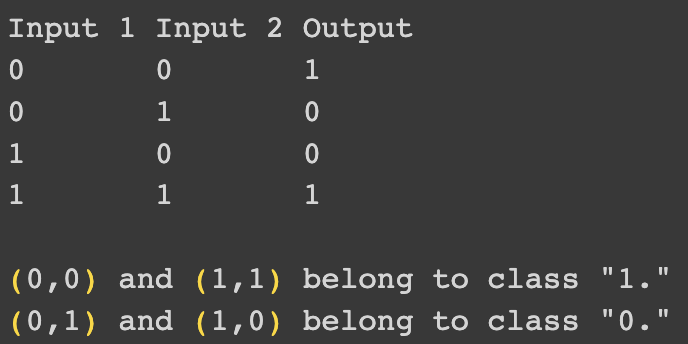

As you can see, you cannot separate this data with a straight line.


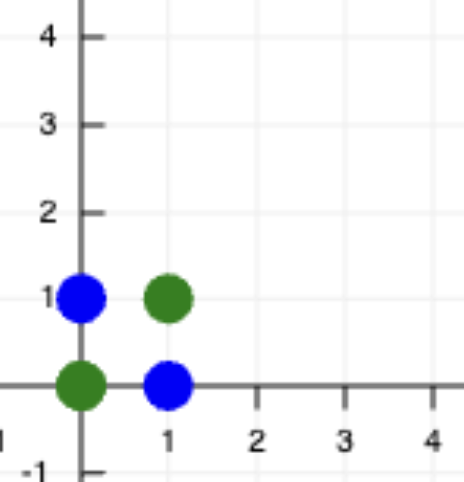

The same issue applies to our four input parity problem, hence the need for deep neural networks!

Now, let's go back to the original model that worked, but let's use libraries and functions, as anyone coding in industry would.

In [ ]:
import numpy as np
from tensorflow import keras # This is a deep learning library.
from tensorflow.keras import layers

# Data
X = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
])

y = np.array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

# Model definition
model = keras.Sequential()
model.add(layers.Dense(4, activation='sigmoid', input_shape=(4,)))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy*100:.2f}%")

# Predictions
predictions = model.predict(X)
rounded_predictions = [round(i[0]) for i in predictions]
print("\nTesting:")
for i, input_data in enumerate(X):
    print(f"Input: {input_data}, Predicted Output: {rounded_predictions[i]}, True Output: {y[i]}")

1/1 [==============================] - 0s 191ms/step - loss: 0.1953 - accuracy: 0.9375
Accuracy: 93.75%
1/1 [==============================] - 0s 113ms/step

Testing:
Input: [0 0 0 0], Predicted Output: 1, True Output: 1
Input: [0 0 0 1], Predicted Output: 0, True Output: 0
Input: [0 0 1 0], Predicted Output: 0, True Output: 0
Input: [0 0 1 1], Predicted Output: 1, True Output: 1
Input: [0 1 0 0], Predicted Output: 0, True Output: 0
Input: [0 1 0 1], Predicted Output: 1, True Output: 1
Input: [0 1 1 0], Predicted Output: 0, True Output: 1
Input: [0 1 1 1], Predicted Output: 0, True Output: 0
Input: [1 0 0 0], Predicted Output: 0, True Output: 0
Input: [1 0 0 1], Predicted Output: 1, True Output: 1
Input: [1 0 1 0], Predicted Output: 1, True Output: 1
Input: [1 0 1 1], Predicted Output: 0, True Output: 0
Input: [1 1 0 0], Predicted Output: 1, True Output: 1
Input: [1 1 0 1], Predicted Output: 0, True Output: 0
Input: [1 1 1 0], Predicted Output: 0, True Output: 0
Input: [1 1 1 1], Predi

See how much easier that was and how much less code that was? We got the same model performance, but it still wasn't perfect. Any guess on how we can get closer to 100%?

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Data
X = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 0],
    [1, 0, 0, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [1, 1, 1, 0],
    [1, 1, 1, 1]
])

y = np.array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

# Model definition
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=5000, verbose=0)

# Evaluation
loss, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy*100:.2f}%")

# Predictions
predictions = model.predict(X)
rounded_predictions = [round(i[0]) for i in predictions]
print("\nTesting:")
for i, input_data in enumerate(X):
    print(f"Input: {input_data}, Predicted Output: {rounded_predictions[i]}, True Output: {y[i]}")

1/1 [==============================] - 0s 129ms/step - loss: 0.0046 - accuracy: 1.0000
Accuracy: 100.00%
1/1 [==============================] - 0s 54ms/step

Testing:
Input: [0 0 0 0], Predicted Output: 1, True Output: 1
Input: [0 0 0 1], Predicted Output: 0, True Output: 0
Input: [0 0 1 0], Predicted Output: 0, True Output: 0
Input: [0 0 1 1], Predicted Output: 1, True Output: 1
Input: [0 1 0 0], Predicted Output: 0, True Output: 0
Input: [0 1 0 1], Predicted Output: 1, True Output: 1
Input: [0 1 1 0], Predicted Output: 1, True Output: 1
Input: [0 1 1 1], Predicted Output: 0, True Output: 0
Input: [1 0 0 0], Predicted Output: 0, True Output: 0
Input: [1 0 0 1], Predicted Output: 1, True Output: 1
Input: [1 0 1 0], Predicted Output: 1, True Output: 1
Input: [1 0 1 1], Predicted Output: 0, True Output: 0
Input: [1 1 0 0], Predicted Output: 1, True Output: 1
Input: [1 1 0 1], Predicted Output: 0, True Output: 0
Input: [1 1 1 0], Predicted Output: 0, True Output: 0
Input: [1 1 1 1], Predi

That worked (using two hidden layers, the first with eight nodes and the second with 4 notes). We also changed some other things about our network like switching from the sigmoid activation function to using both the sigmoid and ReLU activation function (we haven't talked about this, so don't worry about understanding it).

Note that adding layers and nodes doesn't always have a positive impact on performance, though. Up to a point performance increases dimenish and can even decrease, but usually by that point we are talking about thousands of neurons, layers, or both.